## Main Notebook

In [1]:
# Run this cell to set up your notebook
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown

import scipy.stats

import warnings
warnings.filterwarnings("ignore")

In [5]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 2.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


## Data Cleaning

In [6]:
data = pd.read_excel('Voluntary-Registry-Offsets-Database--v8-May-2023 (1).xlsx', sheet_name='PROJECTS', skiprows=3)
data.head(5)

,Project ID,Project Name,Voluntary Registry,ARB \nProject,Voluntary Status,Scope,Type,Reduction / Removal,Methodology / Protocol,Region,...,2022.3,2023.3,Notes from Registry,Notes from Berkeley Carbon Trading Project,Added to Database Version,* rows have equations,Unnamed: 153,"1st issuance yr (no hard code, hide)",Unnamed: 155,Unnamed: 156
0,ACR101,AFOVERT Energy,ACR,No,Canceled,Household & Community,Bundled Energy Efficiency,Reduction,AMS-I.E. Switch from Non-Renewable Biomass for...,Sub Saharan Africa,...,0,0,NaN,NaN,v1 4-2021,*,NaN,0,NaN,1
1,ACR102,Air Bag Gas Substitution,ACR,No,Completed,Chemical Processes,SF6 Replacement,Reduction,Emission reductions through industrial gas sub...,North America,...,0,0,NaN,NaN,v1 4-2021,NaN,NaN,2003,NaN,1
2,ACR103,Inland Empire Anaerobic Ag Digester,ACR,No,Completed,Agriculture,Manure Methane Digester,Reduction,Anaerobic Digestion,North America,...,0,0,NaN,NaN,v1 4-2021,NaN,NaN,2003,NaN,1
3,ACR104,Ankotrofotsy Community-based Reforestation and...,ACR,No,Inactive,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,AR-ACM0001,Sub Saharan Africa,...,0,0,NaN,NaN,v1 4-2021,NaN,NaN,0,NaN,1
4,ACR105,Boa Vista A/R,ACR,No,Canceled,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,AR-ACM0001,South America,...,0,0,NaN,NaN,v1 4-2021,NaN,NaN,2011,NaN,1


In [7]:
data.columns

Index([                                'Project ID',
                                     'Project Name',
                               'Voluntary Registry',
                                    'ARB \nProject',
                                 'Voluntary Status',
                                            'Scope',
                                            ' Type',
                              'Reduction / Removal',
                           'Methodology / Protocol',
                                           'Region',
       ...
                                           '2022.3',
                                           '2023.3',
                              'Notes from Registry',
       'Notes from Berkeley Carbon Trading Project',
                        'Added to Database Version',
                            '* rows have equations',
                                     'Unnamed: 153',
             '1st issuance yr (no hard code, hide)',
                                   

In [8]:
df_main = data.loc[:, 'Project ID':'First Year of Project']
df_main.head(5)

,Project ID,Project Name,Voluntary Registry,ARB \nProject,Voluntary Status,Scope,Type,Reduction / Removal,Methodology / Protocol,Region,...,State,Project Site Location,Project Developer,Total Credits \nIssued,Total Credits \nRetired,Total Credits Remaining,Total Buffer \nPool Deposits,Reversals Covered by Buffer Pool,Reversals Not Covered by Buffer,First Year of Project
0,ACR101,AFOVERT Energy,ACR,No,Canceled,Household & Community,Bundled Energy Efficiency,Reduction,AMS-I.E. Switch from Non-Renewable Biomass for...,Sub Saharan Africa,...,Niono District,Niono,Katene Kadji,0,0,0,0,NaN,NaN,NaN
1,ACR102,Air Bag Gas Substitution,ACR,No,Completed,Chemical Processes,SF6 Replacement,Reduction,Emission reductions through industrial gas sub...,North America,...,OREGON,Beaverton,Nike,7984006,17666,7966340,0,NaN,NaN,2003.0
2,ACR103,Inland Empire Anaerobic Ag Digester,ACR,No,Completed,Agriculture,Manure Methane Digester,Reduction,Anaerobic Digestion,North America,...,CALIFORNIA,Chino,Inland Empire Utilities Agency,44202,44202,0,0,NaN,NaN,2003.0
3,ACR104,Ankotrofotsy Community-based Reforestation and...,ACR,No,Inactive,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,AR-ACM0001,Sub Saharan Africa,...,Miandrivazo,Ankotrofotsy,Tany Meva Foundation,0,0,0,0,NaN,NaN,NaN
4,ACR105,Boa Vista A/R,ACR,No,Canceled,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,AR-ACM0001,South America,...,Roraima,Boa Vista,F.I.T Timber Ltd,2572210,2572210,0,0,NaN,NaN,2011.0


## Credits Issued

In [62]:
main_rows = data.loc[:, 'Project ID':'Project Name']

credits_issued_by_vintage_year = data.loc[:, 1996:2022]

df_credits_issued_by_vintage_year = pd.concat([main_rows, credits_issued_by_vintage_year])
df_credits_issued_by_vintage_year.head(5)

,Project ID,Project Name,1996,1997,1998,1999,2000,2001,2002,2003,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ACR101,AFOVERT Energy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ACR102,Air Bag Gas Substitution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACR103,Inland Empire Anaerobic Ag Digester,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ACR104,Ankotrofotsy Community-based Reforestation and...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACR105,Boa Vista A/R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df_credits_issued_by_vintage_year = pd.melt(df_credits_issued_by_vintage_year, id_vars=['Project ID', 'Project Name'], var_name='Year', value_name='Value')

df_credits_issued_by_vintage_year['Year'] = pd.to_numeric(df_credits_issued_by_vintage_year['Year'], errors='coerce')

df_credits_issued_by_vintage_yearly_sums = df_credits_issued_by_vintage_year.groupby('Year')['Value'].sum()
df_credits_issued_by_vintage_yearly_sums

Year
1996          764.0
1997         1605.0
1998        50724.0
1999        77883.0
2000      1122245.0
2001      1374183.0
2002      1771753.0
2003      5185972.0
2004      8180894.0
2005     10608959.0
2006     17800616.0
2007     33480761.0
2008     35647758.0
2009     49762384.0
2010     62241687.0
2011     79098373.0
2012    106375377.0
2013     97364143.0
2014    108165106.0
2015    136132252.0
2016    165717958.0
2017    172778721.0
2018    173617080.0
2019    200316205.0
2020    180051020.0
2021    132678143.0
2022     26191857.0
Name: Value, dtype: float64

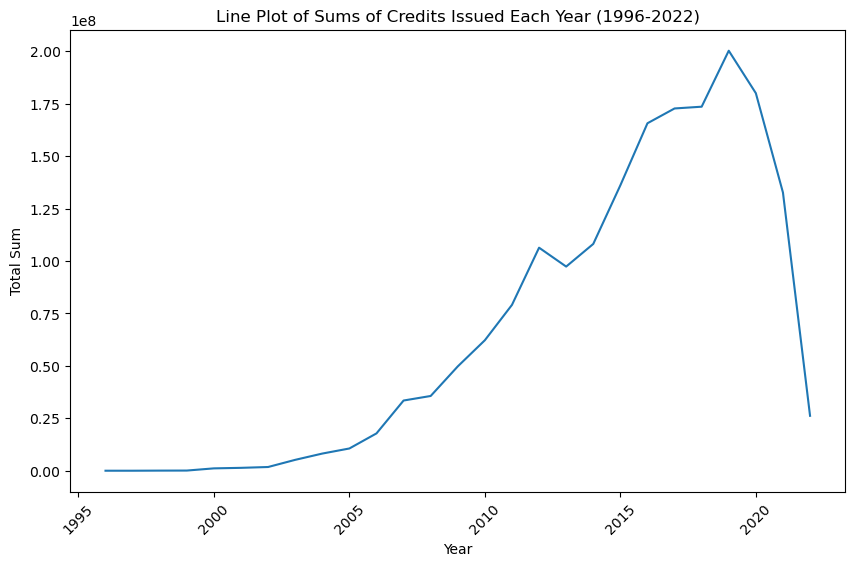

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(df_credits_issued_by_vintage_yearly_sums.index, df_credits_issued_by_vintage_yearly_sums.values)
plt.title('Line Plot of Sums of Credits Issued Each Year (1996-2022)')
plt.xlabel('Year')
plt.ylabel('Total Sum')
plt.xticks(rotation=45)
plt.show()

# Credits Retired

In [65]:
main_rows = data.loc[:, 'Project ID':'Project Name']

credits_retired = data.loc[:, '1996.1':'2022.1']

df_credits_retired = pd.concat([main_rows, credits_retired])
df_credits_retired.head(5)

,Project ID,Project Name,1996.1,1997.1,1998.1,1999.1,2000.1,2001.1,2002.1,2003.1,...,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
0,ACR101,AFOVERT Energy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ACR102,Air Bag Gas Substitution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACR103,Inland Empire Anaerobic Ag Digester,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ACR104,Ankotrofotsy Community-based Reforestation and...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACR105,Boa Vista A/R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
new_columns = [col.replace('.1', '') for col in df_credits_retired.columns]
df_credits_retired.columns = new_columns
df_credits_retired.columns

Index(['Project ID', 'Project Name', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022'],
      dtype='object')

In [68]:
df_credits_retired = pd.melt(df_credits_retired, id_vars=['Project ID', 'Project Name'], var_name='Year', value_name='Value')

df_credits_retired['Year'] = pd.to_numeric(df_credits_retired['Year'], errors='coerce')

df_credits_retired_yearly_sums = df_credits_retired.groupby('Year')['Value'].sum()
df_credits_retired_yearly_sums

Year
1996            0.0
1997            0.0
1998            0.0
1999            0.0
2000            0.0
2001            0.0
2002            0.0
2003            0.0
2004          407.0
2005          369.0
2006         7705.0
2007       423432.0
2008      1972733.0
2009      2766975.0
2010      6783664.0
2011     12042302.0
2012     19078629.0
2013     31783384.0
2014     45365457.0
2015     41154446.0
2016     32091568.0
2017    108945395.0
2018     52618628.0
2019     70123108.0
2020    165512244.0
2021    163538288.0
2022    145624743.0
Name: Value, dtype: float64

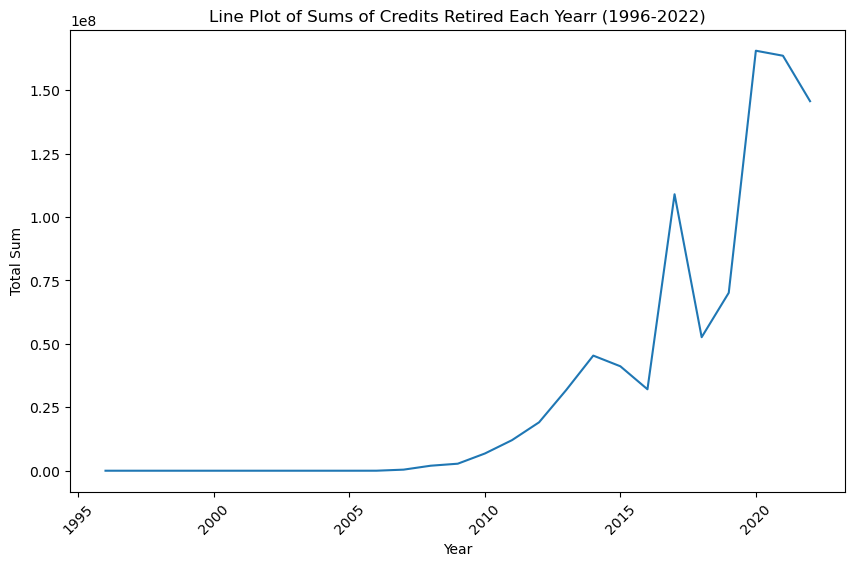

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(df_credits_retired_yearly_sums.index, df_credits_retired_yearly_sums.values)
plt.title('Line Plot of Sums of Credits Retired Each Yearr (1996-2022)')
plt.xlabel('Year')
plt.ylabel('Total Sum')
plt.xticks(rotation=45)
plt.show()

## Credits Remaining

In [90]:
main_rows = data.loc[:, 'Project ID':'Project Name']

credits_remaining_by_vintage = data.loc[:, '1996.2':'2022.2']

df_credits_remaining_by_vintage = pd.concat([main_rows, credits_remaining_by_vintage])
df_credits_remaining_by_vintage.head(5)

,Project ID,Project Name,1996.2,1997.2,1998.2,1999.2,2000.2,2001.2,2002.2,2003.2,...,2013.2,2014.2,2015.2,2016.2,2017.2,2018.2,2019.2,2020.2,2021.2,2022.2
0,ACR101,AFOVERT Energy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ACR102,Air Bag Gas Substitution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACR103,Inland Empire Anaerobic Ag Digester,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ACR104,Ankotrofotsy Community-based Reforestation and...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACR105,Boa Vista A/R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
new_columns = [col.replace('.2', '') for col in df_credits_remaining_by_vintage.columns]
df_credits_remaining_by_vintage.columns = new_columns
df_credits_remaining_by_vintage.columns

Index(['Project ID', 'Project Name', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022'],
      dtype='object')

In [92]:
df_credits_remaining_by_vintage = pd.melt(df_credits_remaining_by_vintage, id_vars=['Project ID', 'Project Name'], var_name='Year', value_name='Value')

df_credits_remaining_by_vintage['Year'] = pd.to_numeric(df_credits_remaining_by_vintage['Year'], errors='coerce')

df_credits_remaining_by_vintage = df_credits_remaining_by_vintage.groupby('Year')['Value'].sum()
df_credits_remaining_by_vintage

Year
1996          764.0
1997         1605.0
1998        50394.0
1999        71336.0
2000       942463.0
2001       276963.0
2002       291792.0
2003      3025876.0
2004      4545945.0
2005      3755833.0
2006      5506393.0
2007      8524521.0
2008      8151878.0
2009     12411186.0
2010     11262365.0
2011     17108030.0
2012     22865069.0
2013     25264899.0
2014     33052252.0
2015     43009273.0
2016     65348095.0
2017     73822049.0
2018     89612048.0
2019    131087574.0
2020    140916252.0
2021    110878712.0
2022     24147222.0
Name: Value, dtype: float64

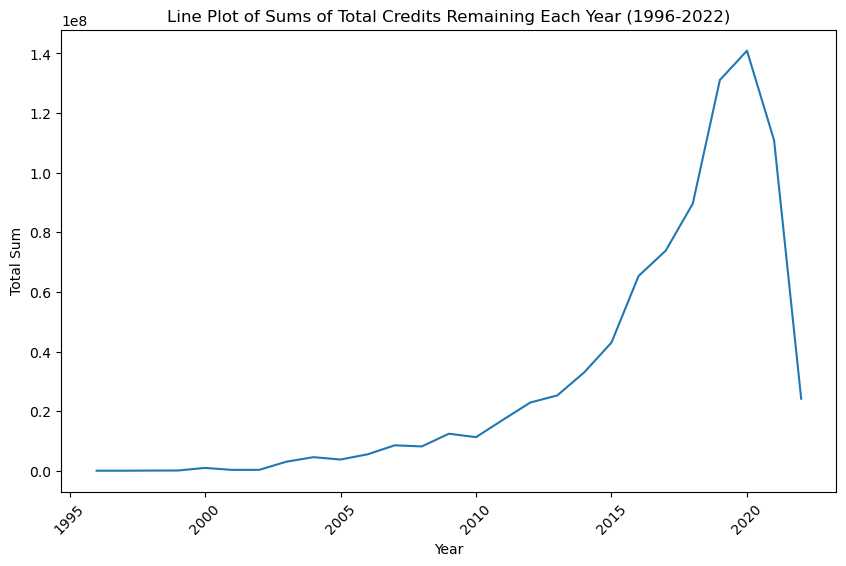

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(df_credits_remaining_by_vintage.index, df_credits_remaining_by_vintage.values)
plt.title('Line Plot of Sums of Total Credits Remaining Each Year (1996-2022)')
plt.xlabel('Year')
plt.ylabel('Total Sum')
plt.xticks(rotation=45)
plt.show()

## Credits Issued by Issuance Year

In [94]:
main_rows = data.loc[:, 'Project ID':'Project Name']

credits_issued_by_issuance_year = data.loc[:, '1996.3':'2022.3']

df_credits_issued_by_issuance_year = pd.concat([main_rows, credits_issued_by_issuance_year])
df_credits_issued_by_issuance_year.head(5)

,Project ID,Project Name,1996.3,1997.3,1998.3,1999.3,2000.3,2001.3,2002.3,2003.3,...,2013.3,2014.3,2015.3,2016.3,2017.3,2018.3,2019.3,2020.3,2021.3,2022.3
0,ACR101,AFOVERT Energy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ACR102,Air Bag Gas Substitution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACR103,Inland Empire Anaerobic Ag Digester,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ACR104,Ankotrofotsy Community-based Reforestation and...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACR105,Boa Vista A/R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
new_columns = [col.replace('.3', '') for col in df_credits_issued_by_issuance_year.columns]
df_credits_issued_by_issuance_year.columns = new_columns
df_credits_issued_by_issuance_year.columns

Index(['Project ID', 'Project Name', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022'],
      dtype='object')

In [96]:
df_credits_issued_by_issuance_year = pd.melt(df_credits_issued_by_issuance_year, id_vars=['Project ID', 'Project Name'], var_name='Year', value_name='Value')

df_credits_issued_by_issuance_year['Year'] = pd.to_numeric(df_credits_issued_by_issuance_year['Year'], errors='coerce')

df_credits_issued_by_issuance_yearly_sums = df_credits_issued_by_issuance_year.groupby('Year')['Value'].sum()
df_credits_issued_by_issuance_yearly_sums

Year
1996            0.0
1997            0.0
1998            0.0
1999            0.0
2000            0.0
2001            0.0
2002       125000.0
2003            0.0
2004          500.0
2005      2880358.0
2006     11027146.0
2007      5847510.0
2008      9222837.0
2009     32152950.0
2010     41917920.0
2011     45841828.0
2012     71546431.0
2013     74764230.0
2014     57177868.0
2015     65185984.0
2016     51192489.0
2017    125591047.0
2018    135151491.0
2019    179241972.0
2020    220150735.0
2021    291694226.0
2022    286813545.0
Name: Value, dtype: float64

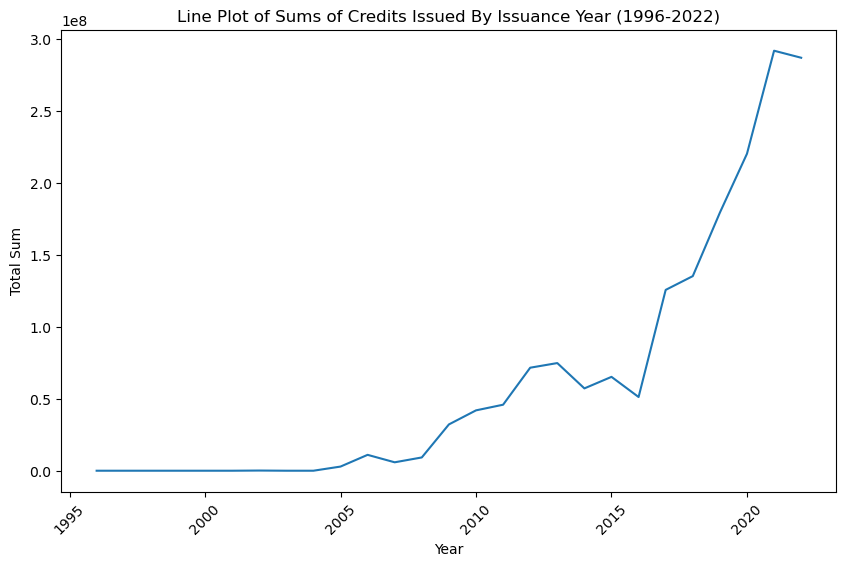

In [97]:
plt.figure(figsize=(10, 6))
plt.plot(df_credits_issued_by_issuance_yearly_sums.index, df_credits_issued_by_issuance_yearly_sums.values)
plt.title('Line Plot of Sums of Credits Issued By Issuance Year (1996-2022)')
plt.xlabel('Year')
plt.ylabel('Total Sum')
plt.xticks(rotation=45)
plt.show()

## All Graphs 

In [99]:
df_merged = pd.concat([df_credits_issued_by_vintage_yearly_sums, df_credits_retired_yearly_sums, df_credits_remaining_by_vintage, df_credits_issued_by_issuance_yearly_sums], 
                      axis=1, keys=['Credits Issued by Vintage', 'Credits Retired', 'Credits Remaining', 'Credits Issued by Issuance Year'])
df_merged

,Credits Issued by Vintage,Credits Retired,Credits Remaining,Credits Issued by Issuance Year
Year,,,,
1996,764.0,0.0,764.0,0.0
1997,1605.0,0.0,1605.0,0.0
1998,50724.0,0.0,50394.0,0.0
1999,77883.0,0.0,71336.0,0.0
2000,1122245.0,0.0,942463.0,0.0
2001,1374183.0,0.0,276963.0,0.0
2002,1771753.0,0.0,291792.0,125000.0
2003,5185972.0,0.0,3025876.0,0.0
2004,8180894.0,407.0,4545945.0,500.0


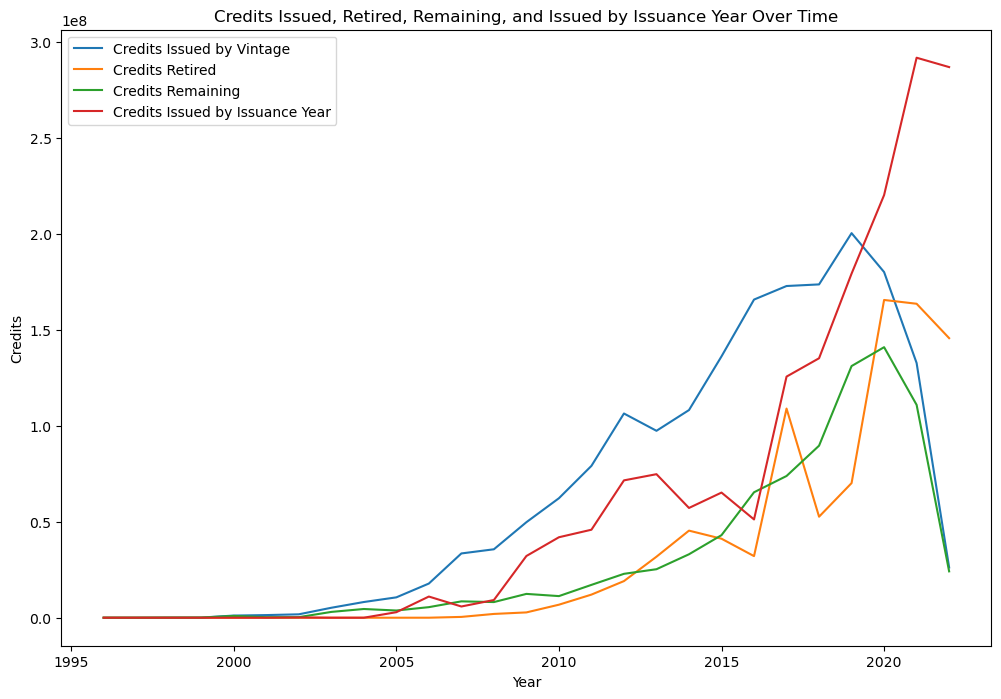

In [100]:
df_merged.plot(kind='line', figsize=(12, 8))

plt.title('Credits Issued, Retired, Remaining, and Issued by Issuance Year Over Time')
plt.xlabel('Year')
plt.ylabel('Credits')
plt.legend(loc='upper left')

plt.show()

## Other Important Information from the xslx 

In [87]:
main_rows = data.loc[:, 'Project ID':'Project Name']

other = data.loc[:, 'Project Owner ':'Project Website']

df_other = pd.concat([main_rows, other])
df_other.head(5)

,Project ID,Project Name,Project Owner,Offset Project Operator,Authorized Project Designee,Verifier,Estimated Annual Emission Reductions,PERs,Registry / ARB,ARB Project Detail,ARB ID,Project Listed,Project Registered,CCB / Certifications,Project Type,Registry \nDocuments,Project Website
0,ACR101,AFOVERT Energy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1,ACR102,Air Bag Gas Substitution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
2,ACR103,Inland Empire Anaerobic Ag Digester,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
3,ACR104,Ankotrofotsy Community-based Reforestation and...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
4,ACR105,Boa Vista A/R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
